<a href="https://colab.research.google.com/github/calzateu/Optimization_1/blob/main/Project/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [99]:
!rm -rf Optimization_1/
!git clone https://github.com/calzateu/Optimization_1.git

Cloning into 'Optimization_1'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 10), reused 14 (delta 3), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [100]:
data = pd.read_excel('Optimization_1/Project/Data_Base.xlsx')

In [101]:
data.head(10)

,C_m_delta_e,U_0,rho,st,c,I_y,C_z_delta_e,m,kp,ki,kd
0,-1.3265,49.408818,1.29,0.252505,0.355711,0.17,-3.565,9242.484970,1.51,2.31,0.06
1,-1.3265,62.106212,1.29,0.322645,0.270942,0.17,-3.565,4661.322645,1.05,1.01,0.01
2,-1.3265,9.134269,1.29,0.591182,0.445892,0.17,-3.565,5977.955912,3.51,5.06,1.01
3,-1.3265,30.561122,1.29,0.897796,0.408016,0.17,-3.565,7979.959920,4.66,16.86,1.01
4,-1.3265,60.320641,1.29,0.557114,0.184369,0.17,-3.565,5923.847695,1.05,1.26,0.01
5,-1.3265,99.206413,1.29,0.482966,0.358417,0.17,-3.565,5328.657315,1.01,3.06,0.01
6,-1.3265,75.002004,1.29,0.210421,0.161824,0.17,-3.565,1865.731463,1.51,1.26,0.06
7,-1.3265,71.232465,1.29,0.855711,0.405311,0.17,-3.565,7691.382766,1.06,3.96,0.01
8,-1.3265,11.316633,1.29,0.521042,0.431463,0.17,-3.565,8593.186373,6.21,4.61,1.01
9,-1.3265,38.298597,1.29,0.272545,0.105912,0.17,-3.565,7222.444890,5.56,7.86,1.01


In [102]:
data.shape

(1000, 11)

In [103]:
data1 = data.drop(['ki', 'kd'], axis = 1)
data1

,C_m_delta_e,U_0,rho,st,c,I_y,C_z_delta_e,m,kp
0,-1.3265,49.408818,1.29,0.252505,0.355711,0.17,-3.565,9242.484970,1.51
1,-1.3265,62.106212,1.29,0.322645,0.270942,0.17,-3.565,4661.322645,1.05
2,-1.3265,9.134269,1.29,0.591182,0.445892,0.17,-3.565,5977.955912,3.51
3,-1.3265,30.561122,1.29,0.897796,0.408016,0.17,-3.565,7979.959920,4.66
4,-1.3265,60.320641,1.29,0.557114,0.184369,0.17,-3.565,5923.847695,1.05
...,...,...,...,...,...,...,...,...,...
995,-1.3265,97.024048,1.29,0.653307,0.397194,0.17,-3.565,4733.466934,1.01
996,-1.3265,15.681363,1.29,0.494990,0.432365,0.17,-3.565,7096.192385,4.86
997,-1.3265,45.044088,1.29,0.496994,0.120341,0.17,-3.565,7276.553106,1.20
998,-1.3265,21.236473,1.29,0.677355,0.105912,0.17,-3.565,6356.713427,5.11


In [104]:
oculta1 = tf.keras.layers.Dense(units=8, input_shape=[8])
oculta2 = tf.keras.layers.Dense(units=8)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [118]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mse',
    metrics=['mae']
)

In [119]:
target = data1.kp
target = np.asarray(target)
training_data = data1.drop(['kp'], axis=1)
training_data = np.asarray(training_data)
#training_data, target

In [120]:
print('Comenzando entrenamiento')
historical = modelo.fit(training_data, target, epochs=1000, verbose=False)
print('Modelo entrenado!')

Comenzando entrenamiento
Modelo entrenado!


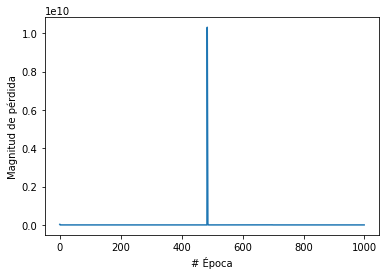

In [121]:
import matplotlib.pyplot as plt
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historical.history['loss'])

In [122]:
print('Hagamos predicción!')
resultado = modelo.predict(training_data[0].reshape(1,8))
print(f'El resultado es: {str(resultado)}')
print(f'El valor real es: {target[0]}')

Hagamos predicción!
El resultado es: [[2.580249]]
El valor real es: 1.51


In [44]:
training_data[0].shape

(8,)

In [51]:
target[0]

1.51

In [77]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 6.5 MB/s 


In [ ]:
# ¿Normalizar datos?

In [78]:
import keras_tuner as kt

In [93]:
def model_builder(hp):
  #model = tf.keras.Sequential()
  #model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  oculta1 = tf.keras.layers.Dense(units=8, input_shape=[8])
  oculta2 = tf.keras.layers.Dense(units=8)
  salida = tf.keras.layers.Dense(units=1)
  model = tf.keras.Sequential([oculta1, oculta2, salida])

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(tf.keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [94]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json


In [95]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [96]:
tuner.search(training_data, target, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units             |480               |?                 
learning_rate     |0.0001            |?                 
tuner/epochs      |2                 |?                 
tuner/initial_e...|0                 |?                 
tuner/bracket     |2                 |?                 
tuner/round       |0                 |?                 

Epoch 1/2
 1/25 [>.............................] - ETA: 9s - loss: 217.6324 - accuracy: 0.0000e+00

InvalidArgumentError: ignored